In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, confusion_matrix

In [2]:
df=pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
df.shape

(2000, 26)

In [4]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [5]:
df.duplicated().sum()

1024

In [6]:
df.drop_duplicates()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,926,bell,grooves,pink,yes,anise,descending,distant,broad,brown,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,289,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label=LabelEncoder()

In [9]:
df['veil_color'].unique()

array(['brown', 'yellow', 'white', 'orange'], dtype=object)

In [10]:
df['veil_color']=label.fit_transform(df[['veil_color']])

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,0,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,0,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,3,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,3,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,2,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,1,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,2,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,0,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,3,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [12]:
label.classes_

array(['brown', 'orange', 'white', 'yellow'], dtype=object)

In [13]:
target=df[['class']]
target

,class
0,poisonous
1,edible
2,poisonous
3,poisonous
4,poisonous
...,...
1995,poisonous
1996,poisonous
1997,poisonous
1998,poisonous


In [14]:
df_new=df.drop('class',axis=1)
df_new

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,yellow,partial,0,two,sheathing,chocolate,clustered,waste,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,brown,universal,0,two,sheathing,brown,numerous,waste,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,gray,universal,3,two,sheathing,purple,abundant,waste,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,pink,partial,3,two,cobwebby,green,clustered,grasses,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,white,universal,2,none,none,yellow,clustered,urban,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,orange,partial,1,one,flaring,purple,abundant,leaves,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,orange,partial,2,one,zone,yellow,numerous,waste,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,red,partial,0,two,evanescent,yellow,abundant,woods,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,pink,universal,3,one,cobwebby,brown,solitary,woods,11.092703,8.423199


In [15]:
feature=pd.get_dummies(data=df_new)
feature

,Unnamed: 0,veil_color,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1167,0,14.276173,5.054983,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1037,0,3.952715,19.068319,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,309,3,9.054265,7.205884,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,282,3,5.226499,20.932692,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,820,2,14.037532,12.545245,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,1,5.877891,17.464145,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1996,1160,2,6.500840,13.501957,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1997,265,0,13.558064,11.270020,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1998,411,3,11.092703,8.423199,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.75,random_state=100)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 124)
(500, 124)
(1500, 1)
(500, 1)


# Svm by using rbf hyperparameter:

In [18]:
svc=SVC(C=1.0,kernel='rbf',gamma=0.1)

In [19]:
svc.fit(x_train,y_train)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.1)

In [20]:
y_pred=svc.predict(x_test)

In [21]:
accuracy_score(y_test,y_pred)

0.86

In [22]:
confusion_matrix(y_test,y_pred)

array([[101,  70],
       [  0, 329]], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      edible       1.00      0.59      0.74       171
   poisonous       0.82      1.00      0.90       329

    accuracy                           0.86       500
   macro avg       0.91      0.80      0.82       500
weighted avg       0.88      0.86      0.85       500



In [24]:
precision,recall,f1_score,_=precision_recall_fscore_support(y_test,y_pred)

In [25]:
print('Precision:',precision)
print('Recall:',recall)
print('f1_score:',f1_score)

Precision: [1.        0.8245614]
Recall: [0.59064327 1.        ]
f1_score: [0.74264706 0.90384615]


<AxesSubplot:>

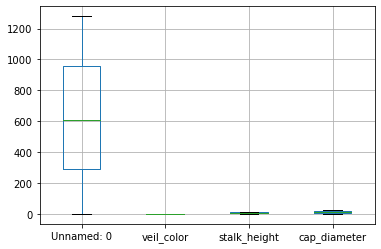

In [26]:
df.boxplot()

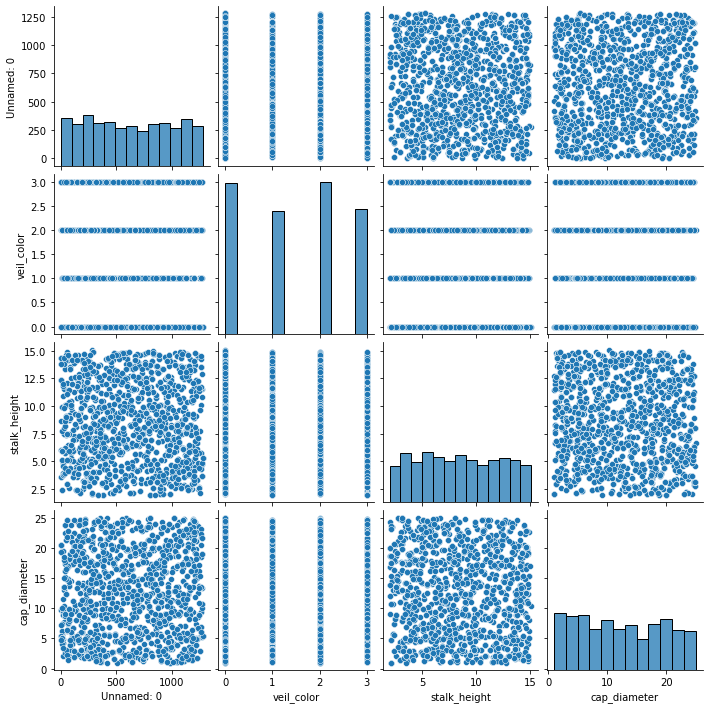

In [27]:
sns.pairplot(data=df)

<AxesSubplot:>

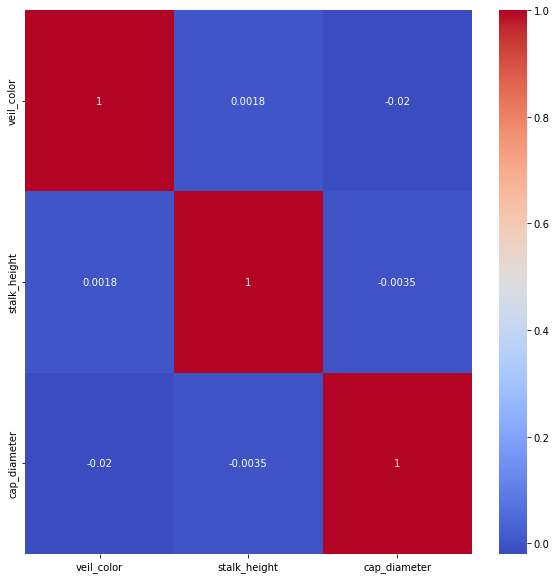

In [28]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df[['veil_color','stalk_height','cap_diameter']].corr(),annot=True,cmap='coolwarm')

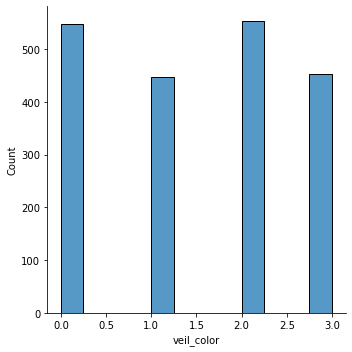

In [29]:
sns.displot(df['veil_color'])

<AxesSubplot:xlabel='stalk_height', ylabel='Count'>

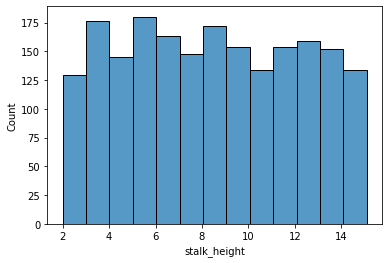

In [30]:
sns.histplot(df['stalk_height'])

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stalk_height', ylabel='Density'>

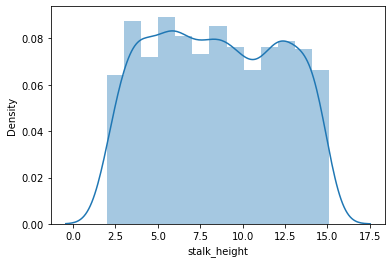

In [31]:
sns.distplot(df['stalk_height'])

In [32]:
svc=SVC(C=12.0,kernel='rbf',gamma=0.3)

In [33]:
svc.fit(x_train,y_train)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=12.0, gamma=0.3)

In [34]:
y_pred1=svc.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred1)

0.86

In [36]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

      edible       1.00      0.59      0.74       171
   poisonous       0.82      1.00      0.90       329

    accuracy                           0.86       500
   macro avg       0.91      0.80      0.82       500
weighted avg       0.88      0.86      0.85       500



In [37]:
svc=SVC(C=1.0,kernel='sigmoid',gamma=0.2)

In [38]:
svc.fit(x_train,y_train)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.2, kernel='sigmoid')

In [39]:
y_pred2=svc.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred2)

0.658

In [41]:
confusion_matrix(y_test,y_pred2)

array([[  0, 171],
       [  0, 329]], dtype=int64)

In [42]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       171
   poisonous       0.66      1.00      0.79       329

    accuracy                           0.66       500
   macro avg       0.33      0.50      0.40       500
weighted avg       0.43      0.66      0.52       500



C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


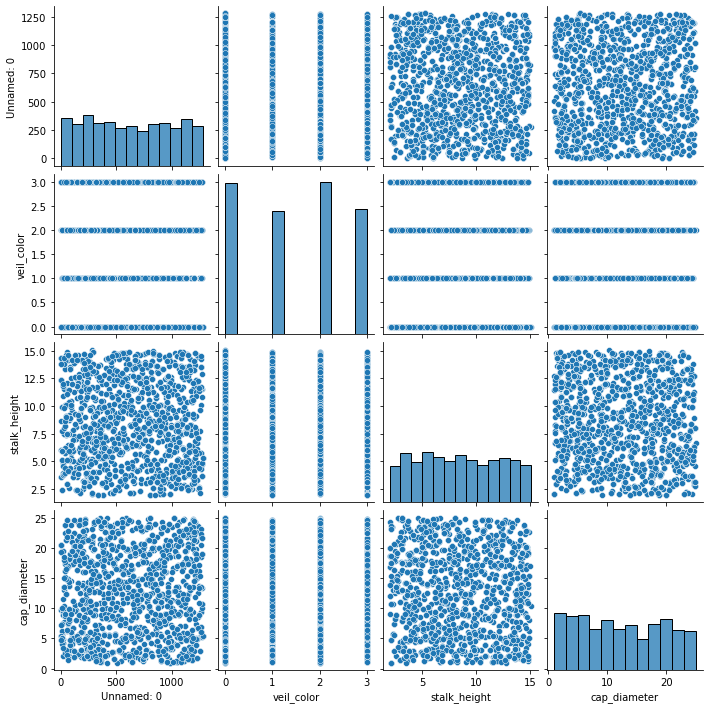

In [43]:
sns.pairplot(data=df_new)

<AxesSubplot:>

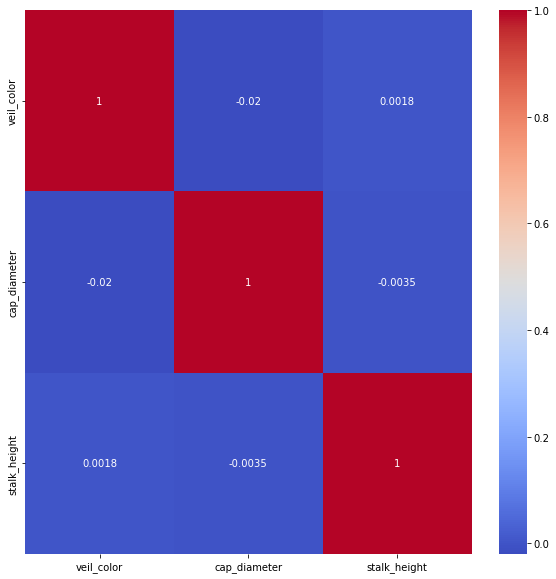

In [44]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df_new[['veil_color','cap_diameter','stalk_height']].corr(),annot=True,cmap='coolwarm')

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cap_diameter', ylabel='Density'>

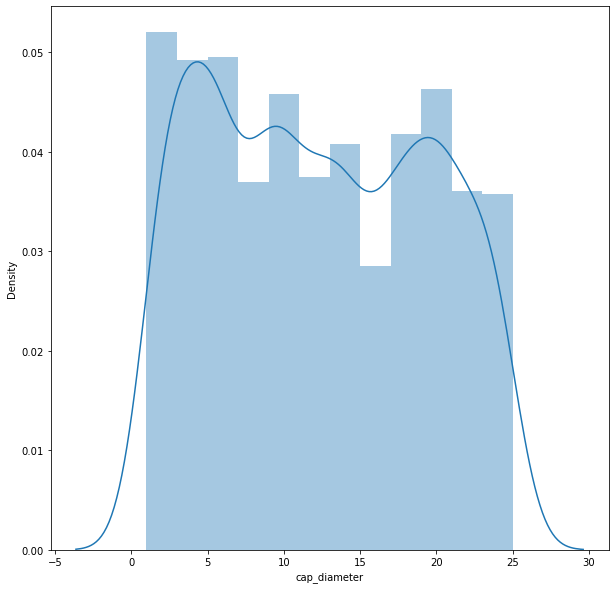

In [45]:
fig=plt.figure(figsize=(10,10))
sns.distplot(df['cap_diameter'])

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
params={'C':[1,2,3,4,5,6,7],'kernel':['rbf','sigmoid'],'gamma':[0.1,0.2,0.3,0.4,0.5]}

In [48]:
params

{'C': [1, 2, 3, 4, 5, 6, 7],
 'kernel': ['rbf', 'sigmoid'],
 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}

In [49]:
grid_search=GridSearchCV(svc,params)
grid_search

GridSearchCV(estimator=SVC(gamma=0.2, kernel='sigmoid'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['rbf', 'sigmoid']})

In [50]:
grid_search.fit(x_train,y_train)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

GridSearchCV(estimator=SVC(gamma=0.2, kernel='sigmoid'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['rbf', 'sigmoid']})

In [51]:
y_pred3=grid_search.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred3)

0.86

In [54]:
confusion_matrix(y_test,y_pred3)

array([[101,  70],
       [  0, 329]], dtype=int64)

In [55]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

      edible       1.00      0.59      0.74       171
   poisonous       0.82      1.00      0.90       329

    accuracy                           0.86       500
   macro avg       0.91      0.80      0.82       500
weighted avg       0.88      0.86      0.85       500



In [56]:
precision,recall,f1_score,_=precision_recall_fscore_support(y_test,y_pred3)

In [57]:
print('Precision:',precision)
print('Recall:',recall)
print('f1_score:',f1_score)

Precision: [1.        0.8245614]
Recall: [0.59064327 1.        ]
f1_score: [0.74264706 0.90384615]


In [58]:
df_new

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,yellow,partial,0,two,sheathing,chocolate,clustered,waste,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,brown,universal,0,two,sheathing,brown,numerous,waste,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,gray,universal,3,two,sheathing,purple,abundant,waste,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,pink,partial,3,two,cobwebby,green,clustered,grasses,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,white,universal,2,none,none,yellow,clustered,urban,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,orange,partial,1,one,flaring,purple,abundant,leaves,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,orange,partial,2,one,zone,yellow,numerous,waste,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,red,partial,0,two,evanescent,yellow,abundant,woods,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,pink,universal,3,one,cobwebby,brown,solitary,woods,11.092703,8.423199


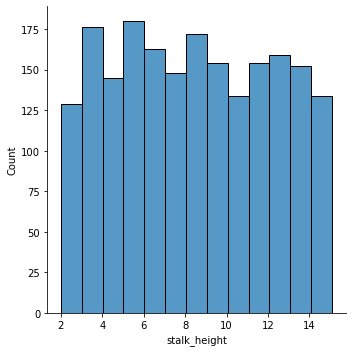

In [59]:
sns.displot(df_new['stalk_height'])

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cap_diameter', ylabel='Density'>

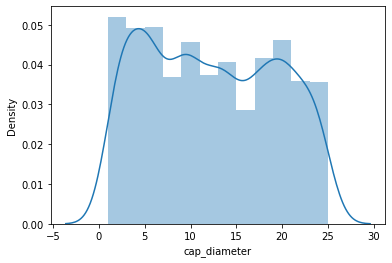

In [60]:
sns.distplot(df_new['cap_diameter'])

<AxesSubplot:>

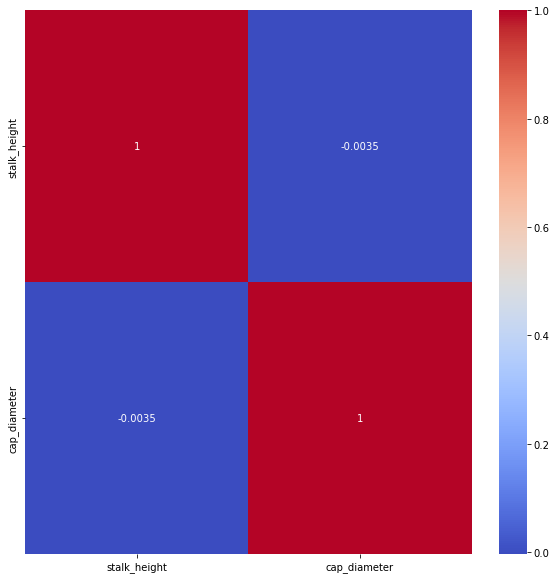

In [63]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df_new[['stalk_height','cap_diameter']].corr(),annot=True,cmap='coolwarm')